In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

np.random.seed(0)

In [2]:
df = pd.read_csv("./datasets/wdbc.data", header=None).drop(columns=[0])
df_malignant = df[df[1] == "M"].drop(columns=[1])
df_benign = df[df[1] == 'B'].drop(columns=[1])

<center> 5-elementowa Próbka danych. Kolumna 1 jest klasą, reszta kolumn jest numeryczna i oznacza odpowiednie cechy. </center> 

In [3]:
display(df.sample(5))
print(f"wymiar danych: {df.shape}")

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
512,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


wymiar danych: (569, 31)


<center> Datasety dla kolejno klas M oraz B. Usunięto kolumnę 1 </center> 

In [4]:
display(df_malignant.head(5))
print(f"wymiar danych: {df_malignant.shape}")

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


wymiar danych: (212, 30)


In [5]:
display(df_benign.head(5))
print(f"wymiar danych: {df_benign.shape}")

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


wymiar danych: (357, 30)


<center> 
Autorzy w opisie danych umieszczają notkę, że dane składają się z 10 cech:
	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

z czego 30 cech wzięło się z 3 osobnych wartości dla każdego z pomiarów: `mean`, `standard error` i `largest value`. 
Do celów analizy wystarczy nam wzięcie jedynie wartości `mean`, zatem zostaje nam 10 cech.
</center> 

In [6]:
col_names = [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave",
    "symmetry",
    "fractal"
]
columns = list(range(2, 12))
columns_dict = dict(zip(columns, col_names))

df_benign = df_benign[columns].rename(columns=columns_dict)
df_malignant = df_malignant[columns].rename(columns=columns_dict)

In [7]:
df_benign

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502


In [8]:
df_malignant

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


<center>
<h4>
2. Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe,
odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle,
itp)
</h4>
</center>

In [9]:
def pointwise_statistics(df):
    stats = df.describe().drop(index='count')
    stats.loc['median'] = df.median(axis=0)
    stats.loc['mode'] = df.mode(axis=0).iloc[0]
    stats.loc['variance'] = df.var(axis=0)
    stats.loc['kurtosis'] = df.kurtosis(axis=0)
    stats.loc['skewness'] = df.skew(axis=0)
    stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']

    return stats

benign_stats = pointwise_statistics(df_benign)
malignant_stats = pointwise_statistics(df_malignant)
benign_stats

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750
median,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
mode,10.260000,14.930000,82.610000,512.200000,0.085110,0.114700,0.000000,0.000000,0.160100,0.059070
variance,3.170222,15.961021,139.415582,18033.030100,0.000181,0.001139,0.001887,0.000253,0.000615,0.000046


Obserwacje:
- Po tabeli statystyk widac od razu, że dane mają bardzo rozbieżne skale, cecha nr 3 i cecha nr 11 różnią się o 3 rzędy (w średniej).
- 

<center>
<h4>
3. Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej)
oraz metoda nieparametryczna (bootstrap) dla średniej i porównanie
</h4>
</center>

# 1. Metoda parametryczna

In [10]:
import pandas as pd
from scipy.stats import t, chi2

def confidence_intervals(df, alpha=0.05):
    n = len(df)
    means = df.mean()
    stds = df.std()
    variances = df.var()
    
    mean_cis = {}
    for col in df.columns:
        mean = means[col]
        std = stds[col]
        t_crit = t.ppf(1 - alpha/2, n-1)
        margin_of_error = t_crit * (std / np.sqrt(n))
        mean_cis[col] = (mean - margin_of_error, mean + margin_of_error)
    
    var_cis = {}
    for col in df.columns:
        var = variances[col]
        chi2_lower = chi2.ppf(alpha/2, n-1)
        chi2_upper = chi2.ppf(1 - alpha/2, n-1)
        lower_bound = (n - 1) * var / chi2_upper
        upper_bound = (n - 1) * var / chi2_lower
        var_cis[col] = (lower_bound, upper_bound)
    
    return mean_cis, var_cis

mean_cis, var_cis = confidence_intervals(df_benign)

mean_cis_df = pd.DataFrame(mean_cis, index=["Lower Bound (Mean)", "Upper Bound (Mean)"]).T

var_cis_df = pd.DataFrame(var_cis, index=["Lower Bound (Variance)", "Upper Bound (Variance)"]).T

confidence_intervals_df = pd.concat([mean_cis_df, var_cis_df], axis=1)

print("Przedziały ufności dla średnich")
display(mean_cis_df)
print("Przedziały ufności dla wariancji")
display(var_cis_df)


Przedziały ufności dla średnich


,Lower Bound (Mean),Upper Bound (Mean)
radius,11.961197,12.331850
texture,17.498925,18.330599
perimeter,76.846415,79.304397
area,448.812766,476.767626
smoothness,0.091078,0.093877
compactness,0.076572,0.083598
concavity,0.041536,0.050579
concave,0.024062,0.027373
symmetry,0.171604,0.176768
fractal,0.062165,0.063570


Przedziały ufności dla wariancji


,Lower Bound (Variance),Upper Bound (Variance)
radius,2.751565,3.692806
texture,13.853223,18.592062
perimeter,121.004493,162.397084
area,15651.605285,21005.625487
smoothness,0.000157,0.000211
compactness,0.000989,0.001327
concavity,0.001638,0.002198
concave,0.000220,0.000295
symmetry,0.000534,0.000717
fractal,0.000040,0.000053


# 2. Metoda Bootstrap

In [11]:
def bootstrap_ci(data, num_samples=1000, alpha=0.05):
    boot_means = []
    boot_vars = []
    n = len(data)
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
        boot_vars.append(np.var(sample, ddof=1))
    
    mean_ci = np.percentile(boot_means, [100*alpha/2, 100*(1-alpha/2)])
    var_ci = np.percentile(boot_vars, [100*alpha/2, 100*(1-alpha/2)])
    
    return mean_ci, var_ci

mean_ci_results = {}
var_ci_results = {}

for column in df_benign.columns:
    data = df_benign[column].values
    mean_ci, var_ci = bootstrap_ci(data)
    mean_ci_results[column] = {
        'Mean CI Lower': mean_ci[0],
        'Mean CI Upper': mean_ci[1]
    }
    var_ci_results[column] = {
        'Variance CI Lower': var_ci[0],
        'Variance CI Upper': var_ci[1]
    }

mean_ci_df_boot = pd.DataFrame(mean_ci_results).T
var_ci_df_boot = pd.DataFrame(var_ci_results).T

print("Przedziały ufności dla średnich cech (bootstrap):")
display(mean_ci_df_boot)

print("Przedziały ufności dla wariancji cech (bootstrap):")
display(var_ci_df_boot)


Przedziały ufności dla średnich cech (bootstrap):


,Mean CI Lower,Mean CI Upper
radius,11.958990,12.328887
texture,17.498072,18.349173
perimeter,76.880464,79.334487
area,449.470287,476.534671
smoothness,0.091221,0.093953
compactness,0.076644,0.083312
concavity,0.041370,0.050430
concave,0.024156,0.027546
symmetry,0.171547,0.176757
fractal,0.062209,0.063581


Przedziały ufności dla wariancji cech (bootstrap):


,Variance CI Lower,Variance CI Upper
radius,2.715014,3.626649
texture,13.062217,19.018141
perimeter,120.781252,160.483438
area,15446.358608,21021.665866
smoothness,0.000148,0.000219
compactness,0.000916,0.001360
concavity,0.001081,0.002928
concave,0.000209,0.000302
symmetry,0.000501,0.000730
fractal,0.000036,0.000058


# 3. Porównanie wyników metody parametrycznej i bootstrap

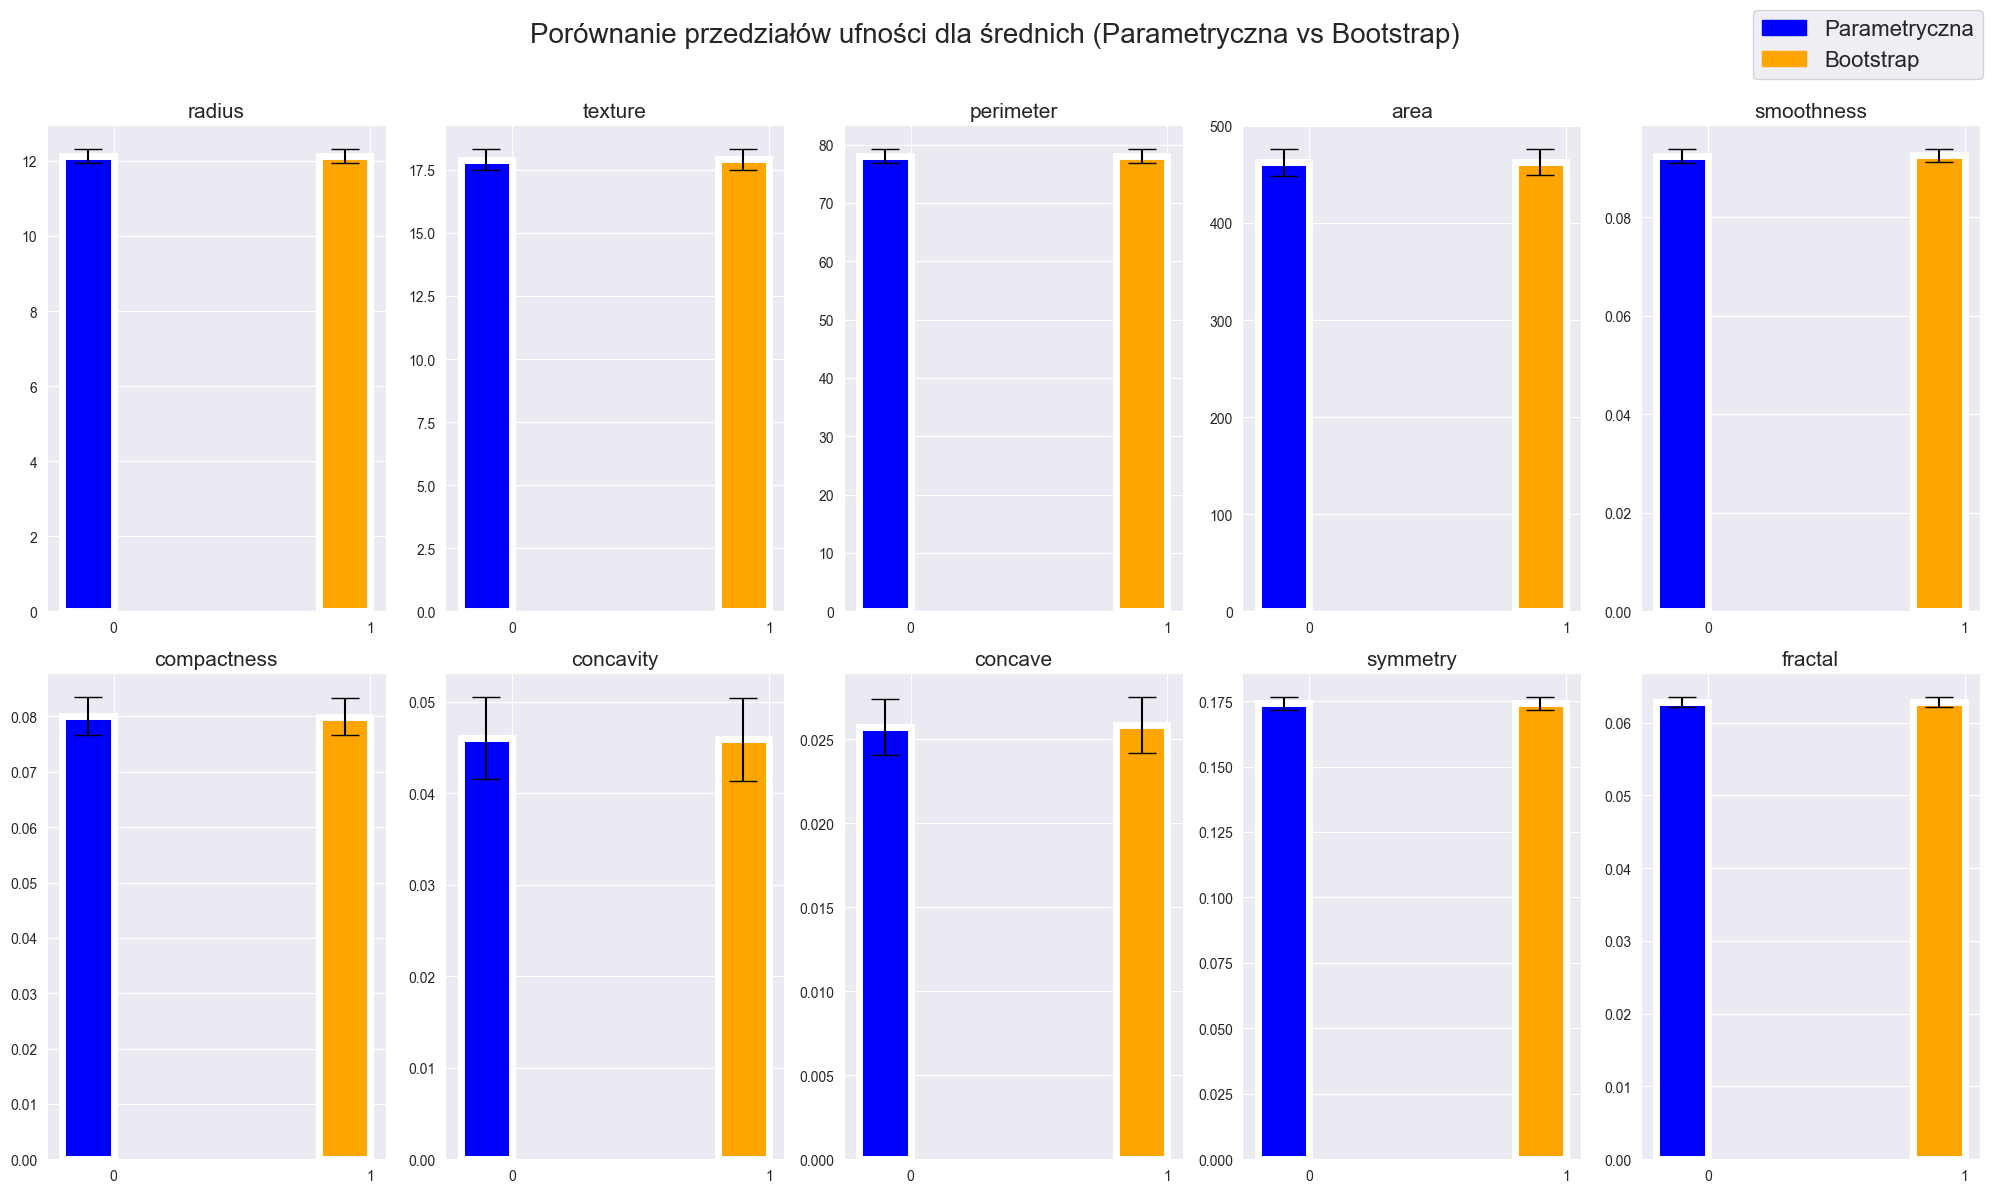

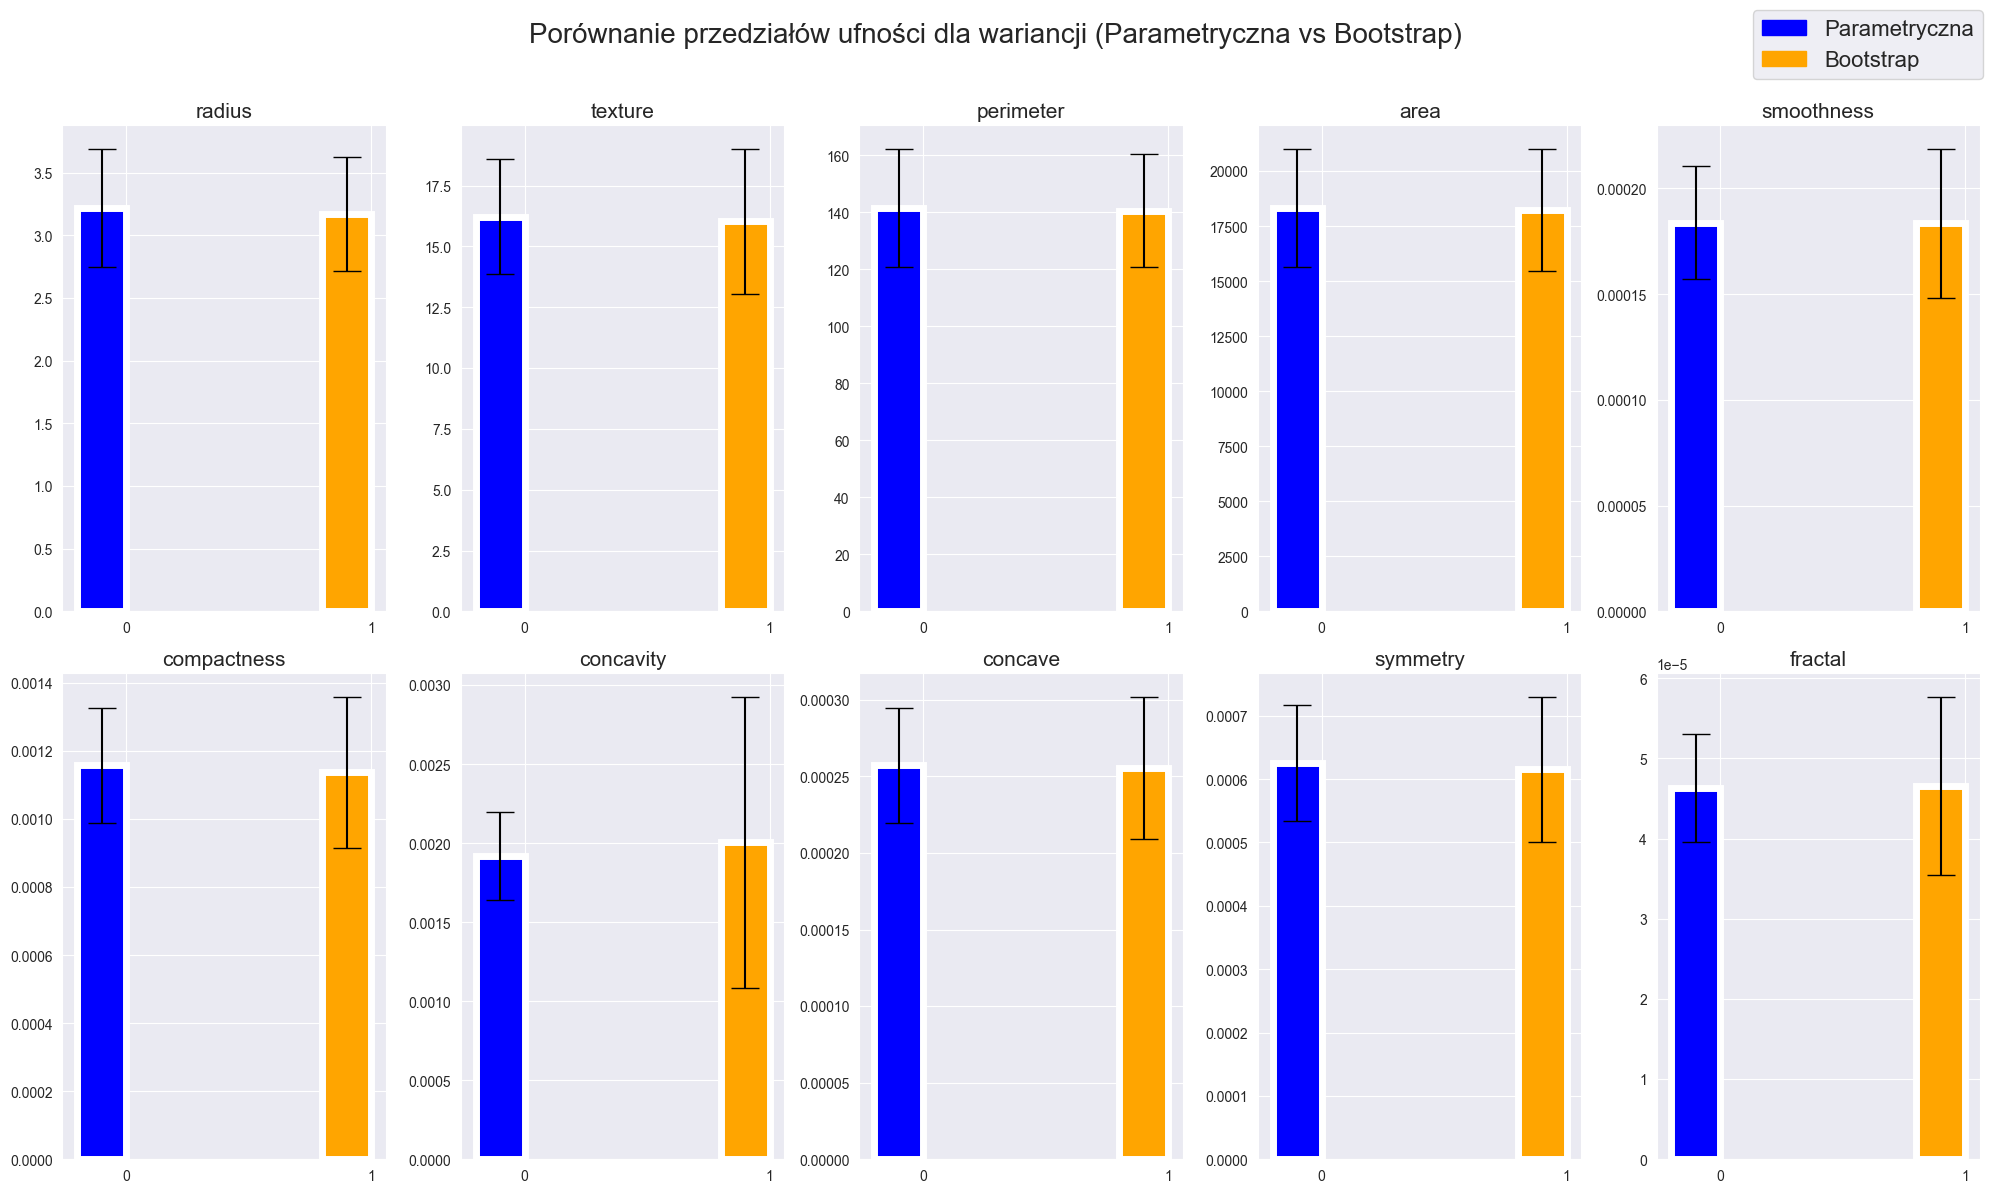

In [12]:
from matplotlib.patches import Patch

def plot_individual_ci_comparison(mean_cis_df, var_cis_df, mean_ci_df_boot, var_ci_df_boot):
    num_features = len(mean_cis_df)
    num_cols = 5
    num_rows = int(np.ceil(num_features / num_cols)) 
    
    fig_mean, axes_mean = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
    fig_mean.suptitle('Porównanie przedziałów ufności dla średnich (Parametryczna vs Bootstrap)', fontsize=20)
    
    legend_patches = [Patch(color='blue', label='Parametryczna'), Patch(color='orange', label='Bootstrap')]
    
    for i, feature in enumerate(mean_cis_df.index):
        row = i // num_cols
        col = i % num_cols
        ax = axes_mean[row, col] if num_rows > 1 else axes_mean[col]
        
        param_mean = mean_cis_df.loc[feature]
        boot_mean = mean_ci_df_boot.loc[feature]
        
        param_error = (param_mean["Upper Bound (Mean)"] - param_mean["Lower Bound (Mean)"]) / 2
        boot_error = (boot_mean["Mean CI Upper"] - boot_mean["Mean CI Lower"]) / 2
        
        x = np.arange(2)
        means = [param_mean["Lower Bound (Mean)"] + param_error, boot_mean["Mean CI Lower"] + boot_error]
        errors = [param_error, boot_error]
        
        ax.bar(x - 0.1, means, 0.2, yerr=errors, capsize=10, color=['blue', 'orange'], linewidth=5)
        ax.set_xticks(x)
        ax.set_title(f'{feature}', fontsize=15)
    fig_mean.legend(handles=legend_patches, loc='upper right', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    fig_var, axes_var = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
    fig_var.suptitle('Porównanie przedziałów ufności dla wariancji (Parametryczna vs Bootstrap)', fontsize=20)
    
    for i, feature in enumerate(var_cis_df.index):
        row = i // num_cols
        col = i % num_cols
        ax = axes_var[row, col] if num_rows > 1 else axes_var[col]

        param_var = var_cis_df.loc[feature]
        boot_var = var_ci_df_boot.loc[feature]

        param_error = (param_var["Upper Bound (Variance)"] - param_var["Lower Bound (Variance)"]) / 2
        boot_error = (boot_var["Variance CI Upper"] - boot_var["Variance CI Lower"]) / 2

        x = np.arange(2)
        vars = [param_var["Lower Bound (Variance)"] + param_error, boot_var["Variance CI Lower"] + boot_error]
        errors = [param_error, boot_error]

        ax.bar(x - 0.1, vars, 0.2, yerr=errors, capsize=10, color=['blue', 'orange'], linewidth=5)
        ax.set_xticks(x)
        ax.set_title(f'{feature}', fontsize=15)
    
    fig_var.legend(handles=legend_patches, loc='upper right', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.show()

plot_individual_ci_comparison(mean_cis_df, var_cis_df, mean_ci_df_boot, var_ci_df_boot)

<center>
<h4>
4. Różne wykresy (im więcej tym lepiej). Powinny być histogramy, wykresy
kwantyl-kwantyl, boxplot i inne.
</h4>
</center>

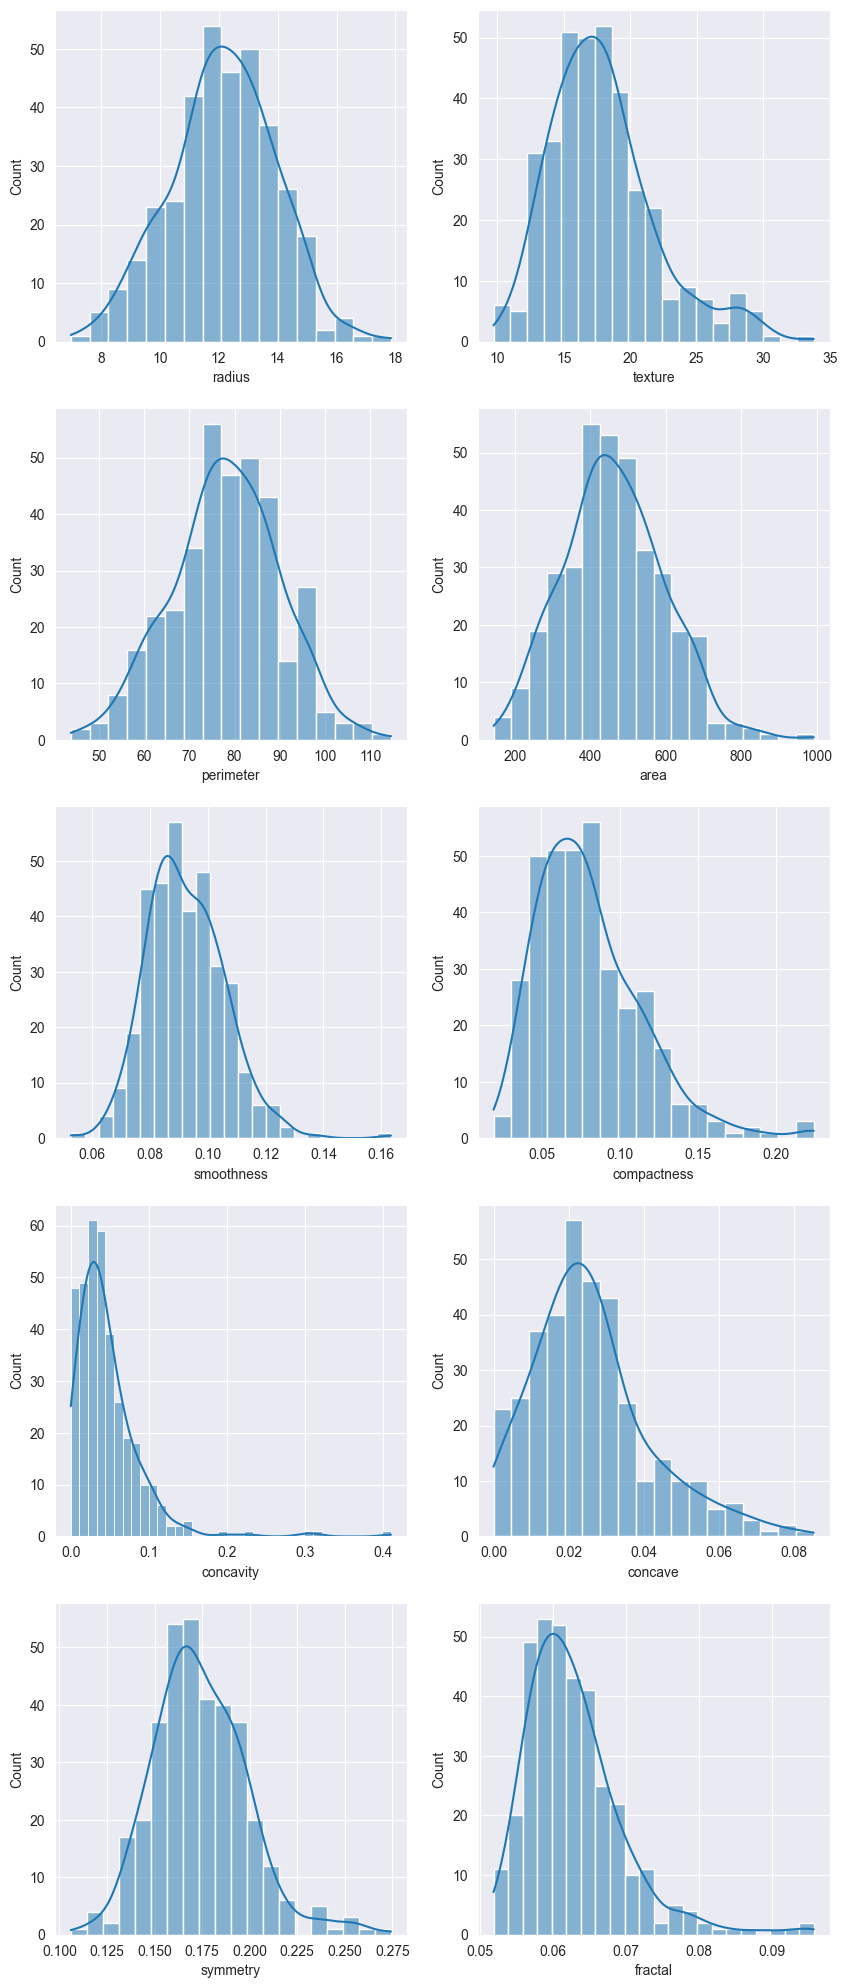

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(10, 25))

for i, col in enumerate(col_names):
    ii = i % 5
    j = i // 5
    sns.histplot(data=df_benign[col], kde=True, ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].grid(True)

plt.show()

<center>
<h4>
5. Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego
</h4>
</center>

<center>
<h4>
6. Estymator jądrowy gęstości
</h4>
</center>